In [100]:
import numpy as np
import os
import skimage
import matplotlib.pyplot as plt
import glob
import sys
import xarray
import xrspatial.multispectral as ms
from PIL import Image
import cv2
import tqdm

total train labels: 11,748


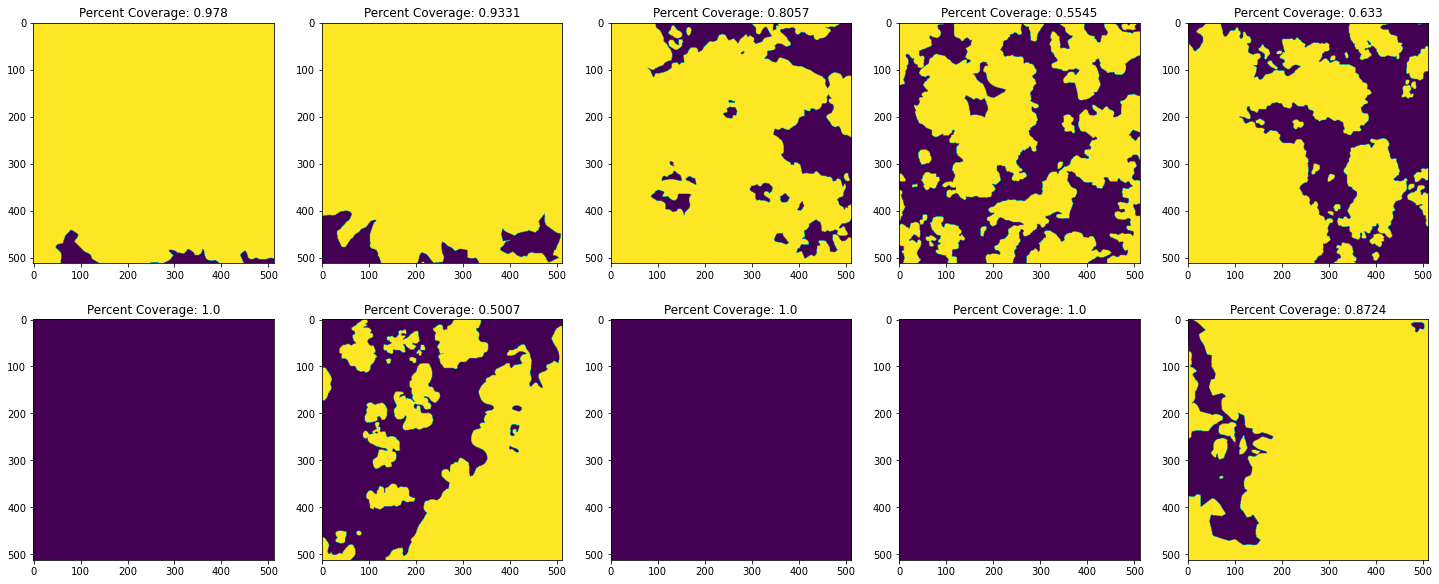

In [28]:
label_files = glob.glob('data/final/public/train_labels/*')
print('total train labels: {:,}'.format(len(label_files)))
fig, axes = plt.subplots(2, 5, figsize=(25, 10))
for ax in axes.ravel():
    img = skimage.io.imread(np.random.choice(label_files, 1)[0])
    ax.imshow(img)
    pcoverage = np.count_nonzero(img) / img.shape[0] / img.shape[1]
    ax.set_title('Percent Coverage: {}'.format(round(pcoverage, 4)))
plt.show()

In [106]:
# reading images helper functions
def get_xarray(filepath):
    """Put images in xarray.DataArray format"""
    im_arr = np.array(Image.open(filepath))
    return xarray.DataArray(im_arr, dims=["y", "x"])


def true_color_img(chip_id, type='train'):
    """Given the path to the directory of Sentinel-2 chip feature images,
    plots the true color image"""
    if type == 'test':
        chip_dir = os.path.join('data/final/private/test_features', chip_id)
    elif type == 'train':
        chip_dir = os.path.join('data/final/public/train_features', chip_id)
    red = get_xarray(os.path.join(chip_dir, "B04.tif"))
    green = get_xarray(os.path.join(chip_dir, "B03.tif"))
    blue = get_xarray(os.path.join(chip_dir, "B02.tif"))

    return np.array(ms.true_color(r=red, g=green, b=blue))

def rgb_to_gray(img):
    return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

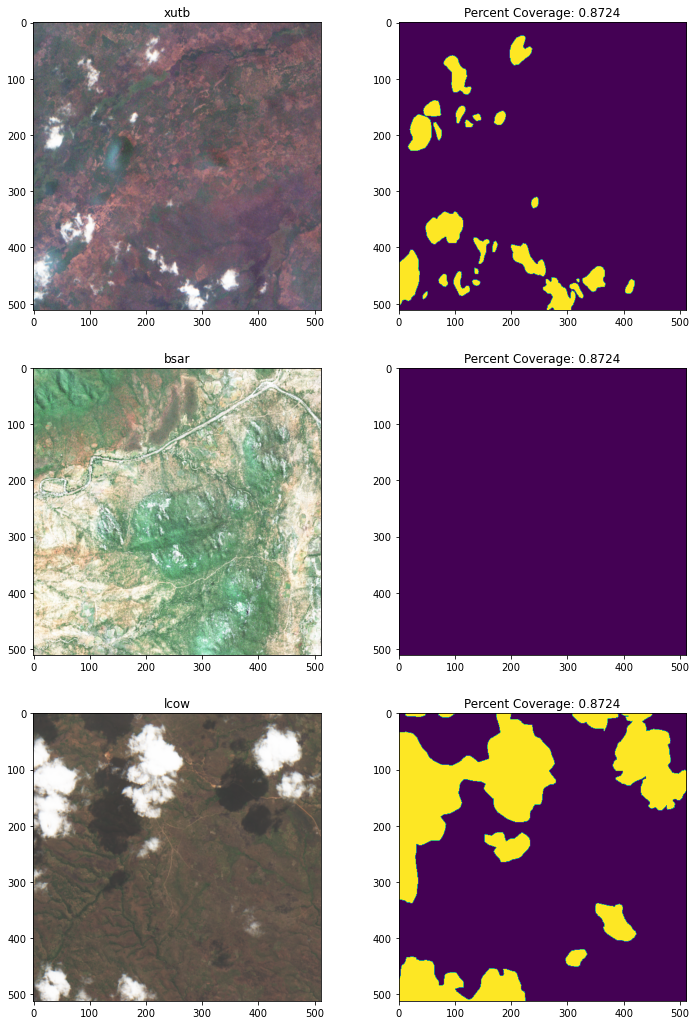

In [74]:
label_files = glob.glob('data/final/public/train_labels/*')
fig, axes = plt.subplots(3, 2, figsize=(12, 18))
for ax1, ax2 in axes:
    choice = np.random.choice(label_files, 1)[0]
    name = os.path.splitext(choice)[0].split('/')[-1]
    feature = true_color_img(name)
    label = skimage.io.imread(choice)
    ax1.imshow(feature)
    ax2.imshow(label)
    pcoverage = np.count_nonzero(img) / img.shape[0] / img.shape[1]
    ax1.set_title(name)
    ax2.set_title('Percent Coverage: {}'.format(round(pcoverage, 4)))
plt.savefig('scratch/examples/img_and_mask.png')
plt.show()

writing:  (<class 'numpy.ndarray'>, dtype('uint8'))
read in:  (<class 'numpy.ndarray'>, dtype('uint8'))
gray:  (<class 'numpy.ndarray'>, dtype('uint8'))


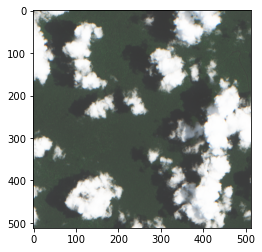

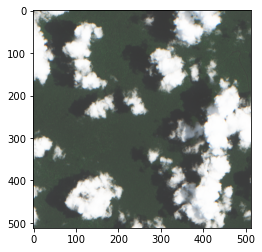

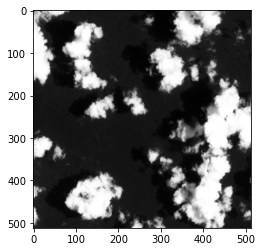

In [97]:
choice = np.random.choice(label_files, 1)[0]
name = os.path.splitext(choice)[0].split('/')[-1]
feature = true_color_img(name)
label = skimage.io.imread(choice)
skimage.io.imsave('scratch/test/test01.tif', feature)
print('writing: ', (type(feature), feature.dtype))
read_in = skimage.io.imread('scratch/test/test01.tif')
print('read in: ', (type(read_in), read_in.dtype))
gray = cv2.cvtColor(read_in, cv2.COLOR_RGB2GRAY)
print('gray: ', (type(gray), gray.dtype))
plt.imshow(feature)
plt.show()
plt.imshow(read_in)
plt.show()
plt.imshow(gray, 'gray')
plt.show()

In [119]:
# loop over image masks, read in features properly and write out grayscale images
for file in tqdm.tqdm(label_files):
    name = os.path.splitext(file)[0].split('/')[-1]
    cmd = "cp {} {}".format(file, os.path.join(f'data/train/labels/{name}.tif'))
    errCode = os.system(cmd)
    if errCode != 0:
        print(errCode)
        print(file)
        sys.exit()
    img = true_color_img(name, 'train')
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    skimage.io.imsave('data/train/imgs/{}.tif'.format(name), gray)

  0%|          | 46/11748 [00:00<03:54, 49.80it/s]/var/folders/9n/95dsry094dn5dcv3cfkm63yw0000gn/T/ipykernel_96801/3274684500.py:12: UserWarning: data/train/imgs/ruqn.tif is a low contrast image
  skimage.io.imsave('data/train/imgs/{}.tif'.format(name), gray)
  3%|▎         | 378/11748 [00:07<03:27, 54.81it/s]/var/folders/9n/95dsry094dn5dcv3cfkm63yw0000gn/T/ipykernel_96801/3274684500.py:12: UserWarning: data/train/imgs/tgso.tif is a low contrast image
  skimage.io.imsave('data/train/imgs/{}.tif'.format(name), gray)
  3%|▎         | 384/11748 [00:07<03:31, 53.65it/s]/var/folders/9n/95dsry094dn5dcv3cfkm63yw0000gn/T/ipykernel_96801/3274684500.py:12: UserWarning: data/train/imgs/tkhh.tif is a low contrast image
  skimage.io.imsave('data/train/imgs/{}.tif'.format(name), gray)
  4%|▍         | 490/11748 [00:09<03:09, 59.40it/s]/var/folders/9n/95dsry094dn5dcv3cfkm63yw0000gn/T/ipykernel_96801/3274684500.py:12: UserWarning: data/train/imgs/njls.tif is a low contrast image
  skimage.io.imsave('d

In [120]:
# same thing as above but for test data
test_label_files = glob.glob('data/final/private/test_labels/*')
np.random.shuffle(test_label_files)
total = len(test_label_files)
for i, file in enumerate(tqdm.tqdm(test_label_files)):
    name = os.path.splitext(file)[0].split('/')[-1]
    out_dir = 'test'
    if i / total > 0.5:
        out_dir = 'valid'
    cmd = "cp {} {}".format(file, os.path.join(f'data/{out_dir}/labels/{name}.tif'))
    errCode = os.system(cmd)
    if errCode != 0:
        print(errCode)
        print(file)
        sys.exit()
    img = true_color_img(name, 'test')
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    skimage.io.imsave('data/{}/imgs/{}.tif'.format(out_dir, name), gray)

  0%|          | 0/10980 [00:00<?, ?it/s]

  0%|          | 34/10980 [00:00<02:53, 63.22it/s]/var/folders/9n/95dsry094dn5dcv3cfkm63yw0000gn/T/ipykernel_96801/2086329006.py:19: UserWarning: data/test/imgs/qoag.tif is a low contrast image
  skimage.io.imsave('data/{}/imgs/{}.tif'.format(out_dir, name), gray)
  2%|▏         | 265/10980 [00:04<02:44, 65.10it/s]/var/folders/9n/95dsry094dn5dcv3cfkm63yw0000gn/T/ipykernel_96801/2086329006.py:19: UserWarning: data/test/imgs/qmum.tif is a low contrast image
  skimage.io.imsave('data/{}/imgs/{}.tif'.format(out_dir, name), gray)
  3%|▎         | 307/10980 [00:04<02:46, 64.10it/s]/var/folders/9n/95dsry094dn5dcv3cfkm63yw0000gn/T/ipykernel_96801/2086329006.py:19: UserWarning: data/test/imgs/jqse.tif is a low contrast image
  skimage.io.imsave('data/{}/imgs/{}.tif'.format(out_dir, name), gray)
  4%|▍         | 419/10980 [00:06<02:52, 61.07it/s]/var/folders/9n/95dsry094dn5dcv3cfkm63yw0000gn/T/ipykernel_96801/2086329006.py:19: UserWarning: data/test/imgs/qnmh.tif is a low contrast image
  skimag

In [121]:
import warnings
warnings.filterwarnings('ignore')

In [122]:
# convert all tifs to jpgs
dirs = ['data/train', 'data/valid', 'data/test']
for directory in dirs:
    for subdir in ['imgs', 'labels']:
        for fpath in tqdm.tqdm(glob.glob(os.path.join(directory, subdir).rstrip('/') + '/*')):
            tif_img = skimage.io.imread(fpath)
            skimage.io.imsave("{}.jpg".format(os.path.splitext(fpath)[0]), tif_img)
            cmd = "rm {}".format(fpath)
            os.system(cmd)

100%|██████████| 5973/5973 [00:28<00:00, 212.50it/s]


gray:  (<class 'numpy.ndarray'>, dtype('uint8'))


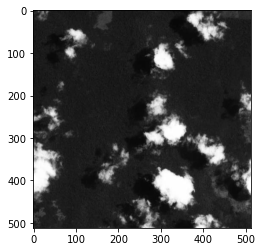

In [131]:
img = skimage.io.imread(np.random.choice(glob.glob('data/train/imgs/*'), 1)[0])
print('gray: ', (type(img), img.dtype))
plt.imshow(img, 'gray')
plt.show()